# Model Performance Comparison

In [1]:
import sys
import os
import pandas as pd
sys.path.append('..')
from src.model import TextClassifier
from src.data_loader import dataset_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

train,val,test = dataset_split(path='../raw/')
X_train, y_train = train['title'], train['label']
X_val, y_val = val['title'], val['label']
X_test, y_test = test['title'], test['label']
model_names = {
    'naive_bayes': 'Naive Bayes',
    'logistic_regression': 'Logistic Regression',
    'svm': 'SVM',
    'random_forest': 'Random Forest',
    'knn': 'KNN'
}

tokenizer_names = {
    'tfidf': 'TF-IDF',
    'count': 'Count Vec'
}
results = []
for model_name in model_names.keys():
    for tokenizer_name in tokenizer_names.keys():
        classifier = TextClassifier(model_name, tokenizer_name)
        classifier.train(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({
            'Model': model_names[model_name],
            'Tokenizer': tokenizer_names[tokenizer_name],
            'Accuracy': accuracy
        })

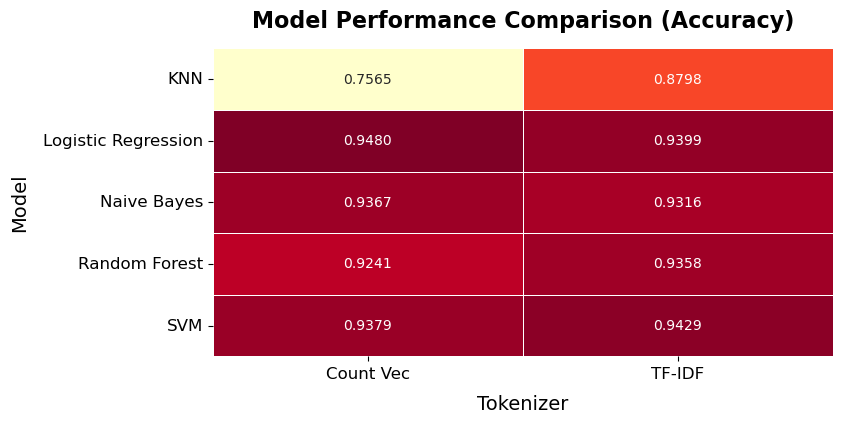

In [3]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', None)
df_results = pd.DataFrame(results)
pivot_table = df_results.pivot(index='Model', columns='Tokenizer', values='Accuracy')
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlOrRd", linewidths=0.5, cbar=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Tokenizer", fontsize=14, labelpad=10)
plt.ylabel("Model", fontsize=14, labelpad=10)
plt.title("Model Performance Comparison (Accuracy)", fontsize=16, fontweight="bold", pad=15)
plt.savefig("model_performance.png", dpi=300, bbox_inches="tight")
plt.show()